In [4]:
from support_code import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
data = np.load('ct_data.npz')
X_train = data['X_train']; X_val = data['X_val']; X_test = data['X_test']
y_train = data['y_train']; y_val = data['y_val']; y_test = data['y_test']

## Question 1

### (a)

In [9]:
# mean is approximately zero
np.mean(y_train)

-9.13868774539957e-15

In [10]:
# mean of y_val is not zero
mean_y_val = np.mean(y_val)
print(mean_y_val)

-0.2160085093241599


In [11]:
unbiased_std = np.sqrt(np.var(y_val, ddof = 1))
std_err_y_val = unbiased_std/np.sqrt(len(y_val))

In [12]:
print('The mean is:', mean_y_val)

The mean is: -0.2160085093241599


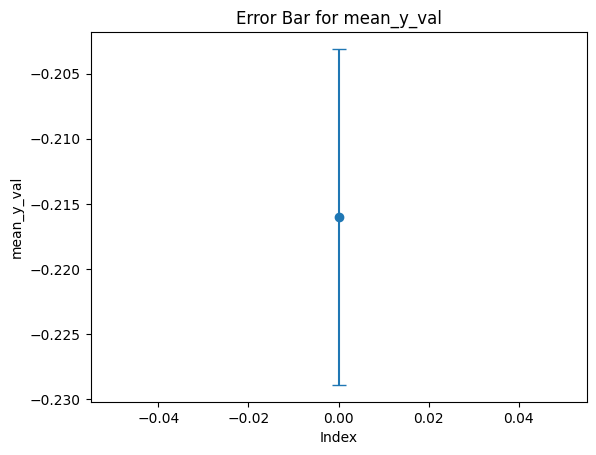

In [13]:
# Plotting the error bar
plt.errorbar(x=[0], y=[mean_y_val], yerr=[std_err_y_val], fmt='o', capsize=5)
plt.title('Error Bar for mean_y_val')
plt.xlabel('Index')
plt.ylabel('mean_y_val')
plt.show()

In [14]:
mean_y_train_first_5785 = np.mean(y_train[:5785])
print(mean_y_train_first_5785)

-0.44247687859693674


In [15]:
unbiased_std = np.sqrt(np.var(y_train[:5785], ddof = 1))
std_err_y_train_first_5785 = unbiased_std/np.sqrt(5785)

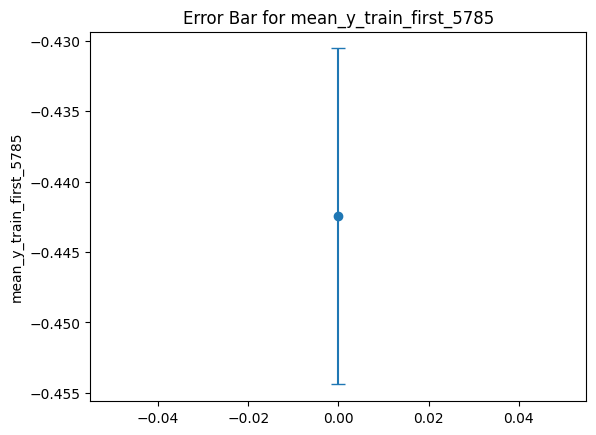

In [16]:
plt.errorbar(x=[0], y=[mean_y_train_first_5785], yerr=[std_err_y_train_first_5785], fmt='o', capsize=5)
plt.title('Error Bar for mean_y_train_first_5785')
plt.ylabel('mean_y_train_first_5785')
plt.show()

Text(0.5, 1.0, 'Error Bars for Mean Estimates plus/minus two standard errors')

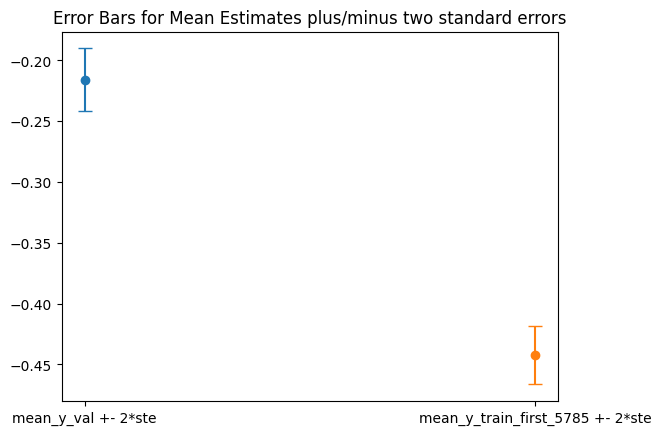

In [17]:
plt.errorbar(x = 'mean_y_val +- 2*ste', y=[mean_y_val], yerr=[2*std_err_y_val], fmt='o', capsize=5)
plt.errorbar(x= 'mean_y_train_first_5785 +- 2*ste', y=[mean_y_train_first_5785], yerr=[2*std_err_y_train_first_5785], fmt='o', capsize=5)
plt.title('Error Bars for Mean Estimates plus/minus two standard errors')

If the standard error bars we calculate for each batch of 5785 samples were reliable, we could expect that, 95% of the time, the mean estimate of each batch would be within two standard errors of the underlying mean. Since the error bars of each batch do not overlap anywhere, this cannot be true for both batches. So it is highly probable that the error bars are inaccurate at estimating the underlying mean of the data and therefore at estimating the average locations of future CT slice data.
Standard error bars are misleading here since they assume the locations of each CT slice to be independent. For example, the 5785 locations in the y_val array refer to just 12 patients. So on average (roughly) 480 consecutive locations are drawn from the same CT scan of one area of the body. Thus, the locations are in fact highly correlated.

### (b)

In [18]:
# Find columns in X_train that have the same value for every row
# compare the first row of X_train to every other row and return a matrix of booleans
# np.all on axis = 0 returns a row vector with true as the ith element if the entire ith column of the boolean matrix was all true, false otherwise
constant_columns = np.all(X_train == X_train[0, :], axis=0) # np.all() returns True if all elements in the array are True. axis = 0 means the logical AND operation is applied over rows
# returns the indices of of constant_columns that are not false
constant_columns_indices = constant_columns.nonzero()[0]

In [19]:
# to report
# the indices we are removing as they are constants
set(constant_columns_indices)

{59, 69, 179, 189, 351}

In [20]:
X_train = np.delete(X_train, constant_columns_indices, axis=1)

In [21]:
X_val = np.delete(X_val, constant_columns_indices, axis=1)
X_test = np.delete(X_test, constant_columns_indices, axis=1)

In [22]:
# Find unique columns in X_train
_, unique_indices = np.unique(X_train, axis=1, return_index=True)
# sort the indices to maintain the original order
unique_indices.sort()

In [23]:
# to report
# the indices were are removing as they are duplicates
set(np.arange(X_train.shape[1])) - set(unique_indices)


{76, 77, 185, 195, 283, 354}

In [24]:
# Select only the unique columns
X_train_unique = X_train[:, unique_indices]

# Update X_val and X_test to have the same columns as X_train_unique
X_val_unique = X_val[:, unique_indices]
X_test_unique = X_test[:, unique_indices]

# Assign the unique columns back to the original variables if needed
X_train = X_train_unique
X_val = X_val_unique
X_test = X_test_unique

## Question 2

In [25]:
def fit_linreg(X, yy, alpha):
    X_bias = np.concatenate([X, np.ones((X.shape[0], 1))], axis = 1) # adding column of 1s to include bias
    reg_matrix = np.sqrt(alpha) * np.eye(X.shape[1])
    reg_matrix_zeros = np.concatenate([reg_matrix, np.zeros((X.shape[1], 1))], axis = 1) # Creating matrix to be concatenated with X
    X_bias_reg = np.concatenate([X_bias, reg_matrix_zeros]) # default axis is 0
    yy_reg = np.concatenate([yy, np.zeros((X.shape[1]))]) # X.shape[1] same as reg_matrix_zeros[0]
    w_fit = np.linalg.lstsq(X_bias_reg, yy_reg, rcond=None)[0]
    return (w_fit[:-1], w_fit[-1])

In [26]:
fitted_weights_bias = fit_linreg(X_train, y_train, 30)
print(fitted_weights_bias)

(array([-6.08615525e-02, -1.06095667e-01,  7.53031143e-02,  2.78057665e-01,
        2.59611794e-01,  1.19816553e-01,  1.05110635e-02,  2.32613667e-01,
       -3.17361266e-01, -7.77510933e-02, -4.17318470e-02,  4.99788622e-02,
       -2.21837493e-02, -2.47999863e-03, -7.29573201e-03,  3.75843616e-02,
        2.67414563e-02,  3.32447940e-03, -8.15353393e-02,  1.75498538e-01,
        7.92614640e-02,  2.86048166e-02, -4.09313322e-02, -6.22094524e-03,
       -6.01902872e-02, -5.63195592e-02, -1.47997259e-02, -4.11106517e-01,
        3.40469070e-01,  2.63461215e-01, -1.35315466e-02,  1.73477525e-03,
       -9.11983421e-03, -6.98890681e-03,  6.51972330e-02, -1.75618988e-01,
       -1.79686338e-01,  2.20532723e-01, -9.06442066e-02, -3.28680365e-02,
       -1.80905054e-01,  1.91033029e-02, -1.75010207e-01,  5.31362120e-02,
       -1.40996396e-01, -2.02005581e-02, -2.04166648e-02,  2.13763380e-02,
       -4.53472384e-01,  8.70663389e-02, -9.25631074e-02, -3.52428163e-03,
       -7.86791379e-02, 

In [27]:
fitted_weights_bias_gradopt = fit_linreg_gradopt(X_train, y_train, 30)
print(fitted_weights_bias_gradopt)

(array([-6.09459112e-02, -1.06071398e-01,  7.53137247e-02,  2.78067524e-01,
        2.59642410e-01,  1.19802796e-01,  1.04873829e-02,  2.32654715e-01,
       -3.17407801e-01, -7.78626347e-02, -4.17044435e-02,  4.99381802e-02,
       -2.21751382e-02, -2.46305464e-03, -7.32516618e-03,  3.75734036e-02,
        2.67390968e-02,  3.33489510e-03, -8.14275674e-02,  1.75546930e-01,
        7.91817524e-02,  2.86900963e-02, -4.09571113e-02, -6.22365283e-03,
       -6.01836129e-02, -5.63285652e-02, -1.48126048e-02, -4.11088206e-01,
        3.40006719e-01,  2.63260131e-01, -1.35220775e-02,  1.71159637e-03,
       -9.13854583e-03, -6.97313812e-03,  6.51868981e-02, -1.75626252e-01,
       -1.79598829e-01,  2.20484194e-01, -9.08532738e-02, -3.28479306e-02,
       -1.80854090e-01,  1.91188784e-02, -1.74987035e-01,  5.31536774e-02,
       -1.40963816e-01, -2.01507887e-02, -2.04656501e-02,  2.15335982e-02,
       -4.52686404e-01,  8.69665845e-02, -9.26558157e-02, -3.51197533e-03,
       -7.87347664e-02, 

In [15]:
def calc_rmse(y_true, y_val):
    return np.sqrt(np.mean((y_true - y_val) ** 2))

In [29]:
# Training with Least Squares Weights
y_pred_train_lstsq = np.matmul(X_train, fitted_weights_bias[0]) + fitted_weights_bias[1]
calc_rmse(y_train, y_pred_train_lstsq)

0.3567565397204054

In [30]:
# Training with Grad Weights
y_pred_train_grad = np.matmul(X_train, fitted_weights_bias_gradopt[0]) + fitted_weights_bias_gradopt[1]
calc_rmse(y_train, y_pred_train_grad)

0.3567571428074778

In [31]:
# Validation with Least Squares Weights
y_pred_val_lstsq = np.matmul(X_val, fitted_weights_bias[0]) + fitted_weights_bias[1]
calc_rmse(y_val, y_pred_val_lstsq)

0.42305219683946926

In [32]:
# Validation with Grad Weights
y_pred_val_grad = np.matmul(X_val, fitted_weights_bias_gradopt[0]) + fitted_weights_bias_gradopt[1]
calc_rmse(y_val, y_pred_val_grad)

0.4230631666614895

## Question 3

In [33]:
def fit_logreg_gradopt(X, yy, alpha):
    D = X.shape[1]
    args = (X, yy, alpha)
    init = (np.zeros(D), np.array(0))
    ww, bb = minimize_list(logreg_cost, init, args)
    return ww, bb

In [34]:
Xt= np.array([[0,4,0,5],[0,6,0,7]])
yt = np.array([1,0])

fit_logreg_gradopt(Xt, yt, 30)

(array([ 0.        , -0.01639343,  0.        , -0.01639368]),
 array(0.18032876))

In [35]:
K = 20 # number of thresholded classification problems to fit
mx = np.max(y_train); mn = np.min(y_train); hh = (mx-mn)/(K+1)
thresholds = np.linspace(mn+hh, mx-hh, num=K, endpoint=True)
weights = []
biases = []
for kk in range(K):
    labels = y_train > thresholds[kk]
    # ... fit logistic regression to these labels
    ww, bb = fit_logreg_gradopt(X_train, labels, 30)
    weights.append(ww)
    biases.append(bb)



In [36]:
# Initialize the new matrix with zeros
X_train_transformed = np.zeros((X_train.shape[0], K)) # K = 20

# Transforming X_train to a new design matrix with 20 features. Iterate over each logistic regression model
for i in range(K):
    X_train_transformed[:, i] = 1/(1 + np.exp( - np.matmul(X_train, weights[i]) + biases[i]))

X_train_transformed

array([[0.05256419, 0.0018007 , 0.00085249, ..., 0.00023464, 0.00059145,
        0.0920103 ],
       [0.05082556, 0.0017817 , 0.00077887, ..., 0.00029677, 0.00078345,
        0.1175247 ],
       [0.04479134, 0.00202821, 0.00093593, ..., 0.00026624, 0.00076276,
        0.12270186],
       ...,
       [0.06851561, 0.05239587, 0.22817085, ..., 0.00873132, 0.00148031,
        0.05138189],
       [0.0211309 , 0.02202776, 0.1973905 , ..., 0.11995729, 0.01454211,
        0.13487457],
       [0.02732322, 0.02030932, 0.19849548, ..., 0.06969964, 0.00792198,
        0.10242523]])

In [37]:
# Transforming X_val to a new design matrix with 20 features
X_val_transformed = np.zeros((X_val.shape[0], K))

for i in range(K):
    X_val_transformed[:, i] = 1/(1 + np.exp( - np.matmul(X_val, weights[i]) + biases[i]))

X_val_transformed

array([[5.84401095e-03, 8.48214311e-03, 2.52575696e-02, ...,
        3.14894122e-01, 3.57366039e-01, 8.26610866e-01],
       [5.87300113e-03, 6.66377908e-03, 1.62055278e-02, ...,
        2.08744387e-01, 2.41429748e-01, 7.42148635e-01],
       [1.06384135e-02, 1.22939794e-02, 4.20334676e-02, ...,
        2.34193461e-02, 1.44411172e-02, 2.81493448e-01],
       ...,
       [1.03048111e-02, 3.59239736e-02, 5.02446849e-03, ...,
        2.08559553e-01, 1.23544085e-02, 1.73138137e-01],
       [8.67552349e-03, 2.94342600e-02, 2.62822174e-02, ...,
        4.48282037e-01, 7.61139689e-02, 1.38128198e-01],
       [1.82385876e-02, 4.11192744e-02, 1.71478795e-01, ...,
        9.15522584e-04, 2.99171661e-04, 8.67883300e-03]])

In [38]:
section = np.unique(np.digitize(y_train[:100], thresholds))
section

array([3, 4, 6, 7], dtype=int64)

In [39]:
ww, bb = fit_linreg(X_train_transformed, y_train, 30)

In [40]:
y_pred_train = np.matmul(X_train_transformed, ww) + bb

In [41]:
# RMSE for y_train
calc_rmse(y_train, y_pred_train)

0.28004986705530077

In [42]:
y_pred_val = np.matmul(X_val_transformed, ww) + bb

In [43]:
# RMSE for y_val
calc_rmse(y_val, y_pred_val)

0.33835544071149043

## Question 4

a

In [6]:
## Initialised with a sensible random initialisation
def fit_nn_cost_randinit(X, yy, alpha, K = 20):
    np.random.seed(42)
    D = X.shape[1]
    args = (X, yy, alpha)
    init = (0.1 * np.random.randn(K) * np.sqrt(K), np.array(0), 0.1 * np.random.randn(K, D) * np.sqrt(D), np.zeros(K))
    ww, bb, V, bk = minimize_list(nn_cost, init, args)
    return ww, bb, V, bk

In [46]:
params_randinit = fit_nn_cost_randinit(X_train, y_train, 30)
y_train_pred_nn_randinit = nn_cost(params_randinit , X_train)
calc_rmse(y_train, y_train_pred_nn_randinit)

0.13897148630907138

In [47]:
y_val_pred_nn_randinit = nn_cost(params_randinit , X_val)
baseline_val = calc_rmse(y_val, y_val_pred_nn_randinit)
baseline_val

0.2705180432023199

In [48]:
y_test_pred_nn_randinit = nn_cost(params_randinit, X_test)
baseline_test = calc_rmse(y_test, y_test_pred_nn_randinit)
baseline_test # used in next section

0.3036401398188032

In [ ]:
# to report
# compare random initialisation validation and test results to initialisation from question 3 weights
# compare joint fitting of nn on validation - bother to calculate a test score for quesiton 3?

b

In [ ]:
V_weight_stack = np.vstack(weights)

In [ ]:
V_weight_stack.shape

(20, 373)

In [ ]:
## Initialised with previous variables
def fit_nn_cost_q3init(X, yy, alpha, init):
    args = (X, yy, alpha) 
    ww, bb, V, bk = minimize_list(nn_cost, init, args)
    return ww, bb, V, bk

In [ ]:
init = (ww, np.array(bb), np.vstack(weights), np.vstack(biases).reshape(20,))

In [ ]:
params_q3init = fit_nn_cost_q3init(X_train, y_train, 30, init)
y_train_pred_nn_q3init = nn_cost(params_q3init, X_train)
calc_rmse(y_train, y_train_pred_nn_q3init)

0.13852473032073362

In [ ]:
y_val_pred_nn_q3init = nn_cost(params_q3init, X_val)
calc_rmse(y_val, y_val_pred_nn_q3init)

0.27259652690055436

In [ ]:
y_test_pred_nn_q3init = nn_cost(params_q3init, X_test)
calc_rmse(y_test, y_test_pred_nn_q3init)

0.29226915427125805

In [ ]:
# to report 
# compare these results to above ones

## Question 5

In [7]:
# we would like to explictly state here that we will not use the test RMSE to inform model selection
# instead we are simply calculating it now for each choice of alpha
# to report the test RMSE for the best alpha (determined by the val RMSE) at the end of question
def train_nn_reg(alpha, K = 20, X_training = X_train, yy_training = y_train, X_validation = X_val, yy_validation = y_val, X_testing = X_test, yy_testing = y_test, return_test = False):
    params = fit_nn_cost_randinit(X_training, yy_training, alpha, K)
    yval_pred_nn = nn_cost(params, X_validation)
    if return_test == True:
        ytest_pred_nn = nn_cost(params, X_testing)
        return calc_rmse(yy_validation, yval_pred_nn), calc_rmse(yy_testing, ytest_pred_nn)
    return calc_rmse(yy_validation, yval_pred_nn)
    

In [8]:
def alpha_to_observation(alpha):
    return np.log(baseline_val) - np.log(train_nn_reg(alpha))

In [9]:
from scipy.stats import norm
def prob_of_improvement(mu, sigma, y_values):
    return norm.cdf((mu - np.max(y_values))/sigma)

In [52]:
# select initial alphas randomly and calculate the resulting values
np.random.seed(42)
alphas = np.arange(0,50,0.02)
alpha_observations = np.random.choice(np.arange(0,50,0.02), 3, replace = False)
alphas = alphas[~np.isin(alphas, alpha_observations)] # boolean indexing - remove randomly chosen alphas
y1 = alpha_to_observation(alpha_observations[0])
y2 = alpha_to_observation(alpha_observations[1])
y3 = alpha_to_observation(alpha_observations[2])
y_observations = np.array([y1, y2, y3])

In [53]:
init_values = (alphas, alpha_observations, y_observations)

In [54]:
def bayesian_opt(iterations, initial_values):
    alphas, alpha_observations, y_observations = initial_values
    max_probs= list()
    picked_alphas = list()
    rmse_list = list()
    for j in range(iterations):
        test_locations_mean , test_locations_cov = gp_post_par(alphas, alpha_observations, y_observations)
        test_locations_std = np.sqrt(np.diag(test_locations_cov))
        probs = prob_of_improvement(test_locations_mean, test_locations_std, y_observations)

        max_index = np.argmax(probs)
        max_probs.append(probs[max_index])
        max_alpha = alphas[max_index]
        picked_alphas.append(max_alpha)
        alpha_observations = np.hstack((alpha_observations, max_alpha))
        alphas = np.hstack((alphas[:max_index], alphas[max_index+1:]))
        rmse_val, rmse_test = train_nn_reg(max_alpha, return_test=True)
        rmse_list.append((rmse_val, rmse_test))
        y = np.log(baseline_val) - np.log(rmse_val)
        y_observations = np.hstack((y_observations , y))

    return picked_alphas, max_probs, rmse_list

In [55]:
picked_alphas, max_probs, rmse_list = bayesian_opt(5, init_values)
display(picked_alphas, max_probs, rmse_list)

[18.46, 15.82, 15.84, 41.12, 0.0]

[0.45553537446794723,
 0.4044392434413637,
 0.31742806281041325,
 0.286680273195424,
 0.285763631424323]

[(0.25568572081605856, 0.2801792491863436),
 (0.2610463562545299, 0.2880772943524409),
 (0.27017950253387923, 0.2879105024999944),
 (0.2741041656562688, 0.3019649626841973),
 (0.2638098910387619, 0.3006261640528834)]

In [56]:
# best alpha corresponds to min RMSE or max observed y value/ negative log RMSE
best_alpha_index = rmse_list.index(min(rmse_list, key = lambda x: x[0]))
best_alpha = picked_alphas[best_alpha_index]
best_alpha_val = rmse_list[best_alpha_index][0]
best_alpha_test = rmse_list[best_alpha_index][1]

In [128]:
# to report
print('Here is a list of the alphas picked and the corresponding probability of improvements:')
for i in range(len(picked_alphas)):
      print('Iteration',i,': alpha =', picked_alphas[i], '; prob of improvement:', max_probs[i])
      
print('The best alpha has the smallest validation RMSE or equivalently the biggest observed y value.')
print('The alpha with this value was', best_alpha, '.')
print('The validation RMSE for the best alpha was', best_alpha_val, 'and the test RMSE was', best_alpha_test, '.')
print('The baseline we set for the model was when alpha = 30')
print('The validation RMSE for this was', baseline_val, 'and the test RMSE was', baseline_test, '.')
print('This means the validation RMSE improved by', baseline_val - best_alpha_val, 
       'and the test RMSE improved by', baseline_test - best_alpha_test, '.')
print('While we have improved the model, the test RMSE indicates that this is only slightly'
      'I am not sure the improvement was significant enough to justify training the neural network.')

Here is a list of the alphas picked and the corresponding probability of improvements:
Iteration 0 : alpha = 18.46 ; prob of improvement: 0.519731946180209
Iteration 1 : alpha = 15.82 ; prob of improvement: 0.5072853710156706
Iteration 2 : alpha = 15.84 ; prob of improvement: 0.46481086395076654
Iteration 3 : alpha = 41.12 ; prob of improvement: 0.4209997760741969
Iteration 4 : alpha = 0.0 ; prob of improvement: 0.4093388450201382
The best alpha has the smallest validation RMSE or equivalently the biggest observed y value.
The alpha with this value was 18.46 .
The validation RMSE for the best alpha was 0.25568572081605856 and the test RMSE was 0.2801792491863436 .
The baseline we set for the model was when alpha = 30
The validation RMSE for this was 0.2705180432023199 and the test RMSE was 0.3036401398188032 .
This means the validation RMSE improved by 0.014832322386261365 and the test RMSE improved by 0.023460890632459597 .
While we have improved the model, the test RMSE indicates tha

## Question 6

Decided to optimise both alpha and K to determine whether there were combinations that might work particularly well together

In [10]:
# baseline : alpha = 18.46, K = 20
q6_baseline_val = best_alpha_val = 0.25568572081605856
q6_baseline_test = best_alpha_test = 0.2801792491863436

In [11]:
def alphaK_pair_to_observation(alpha, K):
    return np.log(q6_baseline_val) - np.log(train_nn_reg(alpha, K))

In [22]:
def tile_input_parameters(alpha_step = 0.1, K_step = 1):
    alphas = np.arange(0,50, alpha_step)
    Ks = np.arange(11,31,K_step)
    tiled_alphas = np.tile(alphas, 20)[:, None]
    tiled_Ks = np.repeat(Ks, int(50/alpha_step))[:, None]
    stack = np.hstack((tiled_alphas, tiled_Ks))
    return stack

In [25]:
# give our model some randomly chosen initial observations
alphaK_stack = tile_input_parameters()
np.random.seed(5)
indices = np.random.choice(range(alphaK_stack.shape[0]), 5, replace = False)
alphaK_observations = alphaK_stack[indices]
alphaK_stack= np.delete(alphaK_stack, indices, axis = 0)
y_observations = np.empty(0)
print(alphaK_observations)
for i in range(len(indices)):
    y_observations = np.hstack((y_observations, alphaK_pair_to_observation(alphaK_observations[i][0], K = int(alphaK_observations[i][1]))))

[[ 5.4 25. ]
 [44.2 11. ]
 [45.4 18. ]
 [28.8 15. ]
 [19.6 17. ]]


In [26]:
# currently includes timings to determine if something is delaying
def gp_post_par_q6(X_rest, X_obs, yy, sigma_y=0.05, ell=5.0, sigma_f=0.1):
    """
    Exact same function as that which is provided in the source code except for the reshaping of X_rest and X_obs
    which is no longer necessary since these inputs are already shaped how we want them to be.
    """
    import time
    start_time = time.time()
    K_rest = gauss_kernel_fn(X_rest, X_rest, ell, sigma_f)
    kernel_rest_time = time.time() - (start_time)
    K_rest_obs = gauss_kernel_fn(X_rest, X_obs, ell, sigma_f)
    kernel_rest_obs_time = time.time() - (kernel_rest_time + start_time)
    K_obs = gauss_kernel_fn(X_obs, X_obs, ell, sigma_f)
    kernel_obs_time = time.time() - (kernel_rest_obs_time + kernel_rest_time + start_time)
    M = K_obs + sigma_y**2 * np.eye(yy.size)
    M_cho, M_low = cho_factor(M)
    cho_factor_time = time.time() - (kernel_obs_time + kernel_rest_obs_time + kernel_rest_time + start_time)
    rest_cond_mu = np.dot(K_rest_obs, cho_solve((M_cho, M_low), yy))
    mu_time = time.time() - (cho_factor_time + kernel_obs_time + kernel_rest_obs_time + kernel_rest_time + start_time)
    rest_cond_cov = K_rest - np.dot(K_rest_obs, cho_solve((M_cho, M_low), K_rest_obs.T))
    cov_time = time.time() - (mu_time + cho_factor_time + kernel_obs_time + kernel_rest_obs_time + kernel_rest_time + start_time)
    times = (kernel_rest_time, kernel_rest_obs_time, kernel_obs_time, cho_factor_time, mu_time, cov_time)
    return rest_cond_mu, rest_cond_cov, times


In [27]:
def bayesian_opt_q6(iterations, initial_values):
    alphaK_stack, alphaK_observations, y_observations = initial_values
    max_probs= list()
    picked_alphaK_pairs = list()
    rmse_list = list()
    for j in range(iterations):
        test_locations_mean , test_locations_cov, times = gp_post_par_q6(alphaK_stack, alphaK_observations, y_observations)
        test_locations_std = np.sqrt(np.diag(test_locations_cov))
        probs = prob_of_improvement(test_locations_mean, test_locations_std, y_observations)
    
        max_index = np.argmax(probs)
        max_probs.append(probs[max_index])
        max_alphaK = alphaK_stack[max_index]
        picked_alphaK_pairs.append(max_alphaK)
        alphaK_observations = np.vstack((alphaK_observations, max_alphaK))
        alphaK_stack = np.delete(alphaK_stack, max_index, axis = 0)
        rmse_val, rmse_test = train_nn_reg(max_alphaK[0], int(max_alphaK[1]), return_test=True)
        rmse_list.append((rmse_val, rmse_test))
        y = np.log(q6_baseline_val) - np.log(rmse_val)
        y_observations = np.hstack((y_observations , y))
        print(alphaK_stack.shape, alphaK_observations.shape, y_observations.shape)
        print(times)
        print(picked_alphaK_pairs, max_probs, rmse_list, y_observations)
    return picked_alphaK_pairs, max_probs, rmse_list

In [28]:
picked_alphaK_pairs, max_probs, rmse_list = bayesian_opt_q6(15, (alphaK_stack, alphaK_observations, y_observations))

(9994, 2) (6, 2) (6,)
(4.494645833969116, 0.0, 0.0, 0.015445947647094727, 0.0, 3.4743106365203857)
[array([ 5., 25.])] [0.32727627675905036] [(0.26190031493565114, 0.2784663629005027)] [ 0.10004305 -0.07203242 -0.09415628 -0.06122237 -0.02071634 -0.02401492]
(9993, 2) (7, 2) (7,)
(7.86833930015564, 0.06740903854370117, 0.016905784606933594, 0.0536351203918457, 0.029698610305786133, 4.717650890350342)
[array([ 5., 25.]), array([11., 26.])] [0.32727627675905036, 0.20551131561721286] [(0.26190031493565114, 0.2784663629005027), (0.240251008918551, 0.27660162641697905)] [ 0.10004305 -0.07203242 -0.09415628 -0.06122237 -0.02071634 -0.02401492
  0.06226479]
(9992, 2) (8, 2) (8,)
(3.6967687606811523, 0.13319897651672363, 0.027234554290771484, 0.009093999862670898, 0.0, 1.7350358963012695)
[array([ 5., 25.]), array([11., 26.]), array([ 9.8, 21. ])] [0.32727627675905036, 0.20551131561721286, 0.21416592601090578] [(0.26190031493565114, 0.2784663629005027), (0.240251008918551, 0.27660162641697905)

In [29]:
# best alpha-K pair corresponds to min RMSE or max observed y value/ negative log RMSE
best_alphaK_index = rmse_list.index(min(rmse_list, key = lambda x: x[0]))
best_alphaK = picked_alphaK_pairs[best_alphaK_index]
best_alphaK_val = rmse_list[best_alphaK_index][0]
best_alphaK_test = rmse_list[best_alphaK_index][1]

In [30]:
# to report 
print('Here is a list of the (alpha,K) pairs picked and the corresponding probability of improvements:')
for i in range(len(picked_alphaK_pairs)):
      print('Iteration',i+1,': alpha =', picked_alphaK_pairs[i], '; prob of improvement:', max_probs[i])
print('For an (alpha,K) pair to be an improvement on our baseline we needed the observed y value' 
      'to be positive. The best (alpha,K) pair would have the largest observed y value'
       ' or equivalently the smallest validation RMSE')
print('The best (alpha,K) pair was', best_alphaK, '.')
print('The validation RMSE was', best_alphaK_val, 'and the test RMSE was', best_alphaK_test, '.')
print('The baseline we set for the model was the pair of alpha = ', best_alpha_val,' and K = 20 determined from the previous question.')
print('The baseline validation RMSE was', q6_baseline_val, 'and the baseline test RMSE was', q6_baseline_test, '.')
print('This means the validation RMSE improved by', q6_baseline_val - best_alphaK_val, 
       'and the test RMSE improved by', q6_baseline_test - best_alphaK_test, '.')
print('So in reality, we haven\'t actualled improved the model according to the test RMSE - which is unfortunate.')

Here is a list of the (alpha,K) pairs picked and the corresponding probability of improvements:
Iteration 1 : alpha = [ 5. 25.] ; prob of improvement: 0.32727627675905036
Iteration 2 : alpha = [11. 26.] ; prob of improvement: 0.20551131561721286
Iteration 3 : alpha = [ 9.8 21. ] ; prob of improvement: 0.21416592601090578
Iteration 4 : alpha = [ 9. 30.] ; prob of improvement: 0.2670721502937398
Iteration 5 : alpha = [17.3 28. ] ; prob of improvement: 0.1858240875934739
Iteration 6 : alpha = [33.6 30. ] ; prob of improvement: 0.15704881739603477
Iteration 7 : alpha = [ 0. 11.] ; prob of improvement: 0.15480685443073722
Iteration 8 : alpha = [49.9 30. ] ; prob of improvement: 0.1520858439401621
Iteration 9 : alpha = [ 0. 29.] ; prob of improvement: 0.14841750760998002
Iteration 10 : alpha = [15. 11.] ; prob of improvement: 0.12256489241872881
Iteration 11 : alpha = [24.1 30. ] ; prob of improvement: 0.11689510316944718
Iteration 12 : alpha = [21.4 11. ] ; prob of improvement: 0.0992021490